<a href="https://colab.research.google.com/github/Myrashah4/Myrashah4/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 34.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Read = pd.read_csv("train.csv")

In [ ]:
Read.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
Read.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
Read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


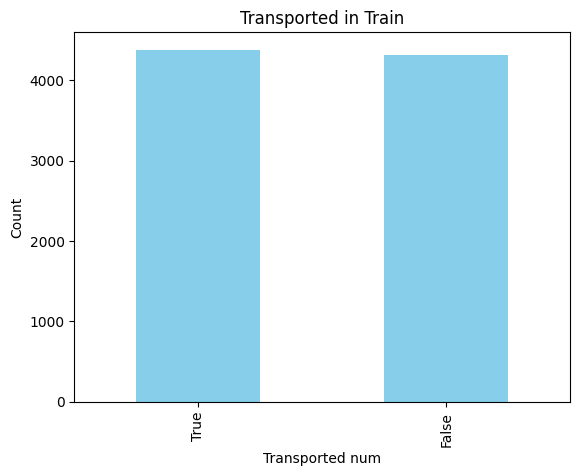

In [ ]:
Trrain = Read['Transported'].value_counts()
Trrain.plot(kind= 'bar', color='skyblue')
plt.title('Transported in Train')
plt.xlabel('Transported num')
plt.ylabel('Count')
plt.show()

In [ ]:
Read.drop(['Name', 'PassengerId'], axis=1, inplace=True)


In [ ]:
print("\nMissing values:")
print(Read.isnull().sum().sort_values(ascending=False))


Missing values:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64


In [ ]:
Read['CryoSleep'].fillna(0, inplace=True)
Read['VIP'].fillna(0, inplace=True)
Read = Read.astype({'CryoSleep': int, 'VIP': int})

In [ ]:
Read = Read.fillna(0)

In [ ]:
Read['CryoSleep'] = Read['CryoSleep'].astype(int)
Read['VIP'] = Read['VIP'].astype(int)

In [ ]:
Read['Transported'] = Read['Transported'].map({'Yes': 1, 'No': 0})

In [ ]:
Read[['Deck', 'Cabin_num', 'Side']] = Read['Cabin'].str.split('/', expand=True)
Read.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

    dataset = np.arange(100)
train_dataset, test_dataset = split_dataset(Read, test_ratio=0.2)
print(f"Training set: {train_dataset}")
print(f"Testing set: {test_dataset}")

Training set:      HomePlanet  CryoSleep    Destination   Age  VIP  RoomService  FoodCourt  \
0        Europa          0    TRAPPIST-1e  39.0    0          0.0        0.0   
1         Earth          0    TRAPPIST-1e  24.0    0        109.0        9.0   
2        Europa          0    TRAPPIST-1e  58.0    1         43.0     3576.0   
3        Europa          0    TRAPPIST-1e  33.0    0          0.0     1283.0   
4         Earth          0    TRAPPIST-1e  16.0    0        303.0       70.0   
...         ...        ...            ...   ...  ...          ...        ...   
8688     Europa          0    55 Cancri e  41.0    1          0.0     6819.0   
8689      Earth          1  PSO J318.5-22  18.0    0          0.0        0.0   
8690      Earth          0    TRAPPIST-1e  26.0    0          0.0        0.0   
8691     Europa          0    55 Cancri e  32.0    0          0.0     1049.0   
8692     Europa          0    TRAPPIST-1e  44.0    0        126.0     4688.0   

      ShoppingMall     Sp

type question here :  

In [ ]:
def df_to_dataset(dataframe):
    # Separating features and labels
    features = dataframe.copy()
    labels = features.pop('Transported')

    # Converting features to TensorFlow Dataset
    feature_ds = tf.data.Dataset.from_tensor_slices(dict(features))

    # Converting labels to TensorFlow Dataset
    label_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Joining features and labels into a single dataset
    ds = tf.data.Dataset.zip((feature_ds, label_ds))

    return ds
# Assuming 'Transported' column contains non-numeric values that need conversion
train_dataset['Transported'] = pd.to_numeric(train_dataset['Transported'], errors='coerce')
test_dataset['Transported'] = pd.to_numeric(test_dataset['Transported'], errors='coerce')

# Dropping rows with NaN values after conversion
train_dataset = train_dataset.dropna(subset=['Transported'])
test_dataset = test_dataset.dropna(subset=['Transported'])

# Then proceed with converting datasets to TensorFlow datasets
train_ds = df_to_dataset(train_dataset)
test_ds = df_to_dataset(test_dataset)


<ipython-input-16-b0939997e671>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['Transported'] = pd.to_numeric(train_dataset['Transported'], errors='coerce')
<ipython-input-16-b0939997e671>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Transported'] = pd.to_numeric(test_dataset['Transported'], errors='coerce')


In [ ]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

Use /tmp/tmp5ldd_jd3 as temporary training directory


In [ ]:
model.compile(metrics=['accuracy'])
model.fit(train_ds)


ValueError: The dataset does not contain a 'batch' operation. TF-DF models should be trained with batch operations. Add a batch operations to solve this issue. Alternatively, you can disabled this check with the constructor argument `check_dataset=False`. If this message is a false positive, please let us know so we can improve this dataset check logic.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)
oob_accuracy = model.evaluate(train_ds, return_dict=True)['accuracy_out_of_bag']
num_trees = range(1, len(oob_accuracy) + 1)

plt.plot(num_trees, oob_accuracy)
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Accuracy')
plt.show()

In [ ]:
# Evaluate the model on the Out of bag (OOB) data
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Accuracy')
plt.title('Out-of-Bag Accuracy vs. Number of Trees')
plt.show()

# See some general statistics on the OOB dataset
inspector = model.make_inspector()
oob_stats = inspector.evaluation()
print("Out-of-Bag Statistics:")
print(oob_stats)

# Run the evaluation using the validation dataset
evaluation = model.evaluate(test_ds, return_dict=True)
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

# Display the important features
importances = inspector.variable_importances()["NUM_AS_ROOT"]
print("Important Features:")
print(importances)
